<a href="https://colab.research.google.com/github/jbarnesspain/multitask_negation_for_targeted_sentiment/blob/master/notebooks/Cross_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import List, Dict
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np

matplotlib.rc('font', size=14)
matplotlib.rc('axes', titlesize=14)
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('legend', fontsize=10)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
sns.set_style("whitegrid")

ROW_ORDER=['Test', 'Validation']
DATASET_ORDER = ['Laptop', 'Restaurant', 'MAMS', 'mpqa']

def mean_std(data: pd.Series) -> str:
   to_percentage = data * 100
   return f'{np.mean(to_percentage):.2f} ({np.std(to_percentage):.2f})'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cross Domain

This uses the CWR models where they have been trained on one of the following datasets:
1. Laptop
2. Restaurant
3. MAMS
4. mpqa

Of which all of them use domain specific CWR apart from mpqa which uses a generic.

In [2]:
import requests
json_results = requests.get('https://raw.githubusercontent.com/jbarnesspain/multitask_negation_for_targeted_sentiment/master/data/results/en/cross_domain/results.json')
results_df = pd.DataFrame(json_results.json())
not_metric_cols = ['Model', 'Trained Dataset', 'Tested Dataset', 'Split', 'Run']
metric_cols = [col_name for col_name in results_df.columns.tolist() 
               if col_name not in not_metric_cols]
results_df = pd.melt(results_df, id_vars=not_metric_cols, value_vars=metric_cols, 
                     var_name='Metric', value_name='Score')
test_results_df = results_df[results_df['Split']=='Test']
val_results_df = results_df[results_df['Split']=='Validation']
results_df.head()

,Model,Trained Dataset,Tested Dataset,Split,Run,Metric,Score
0,STL,mpqa,Restaurant,Validation,0,F1-a,0.000000
1,STL,mpqa,Restaurant,Validation,1,F1-a,0.004396
2,STL,mpqa,Restaurant,Validation,2,F1-a,0.004405
3,STL,mpqa,Restaurant,Validation,3,F1-a,0.004329
4,STL,mpqa,Restaurant,Validation,4,F1-a,0.000000


# F1-i
## Restaurant as the training dataset

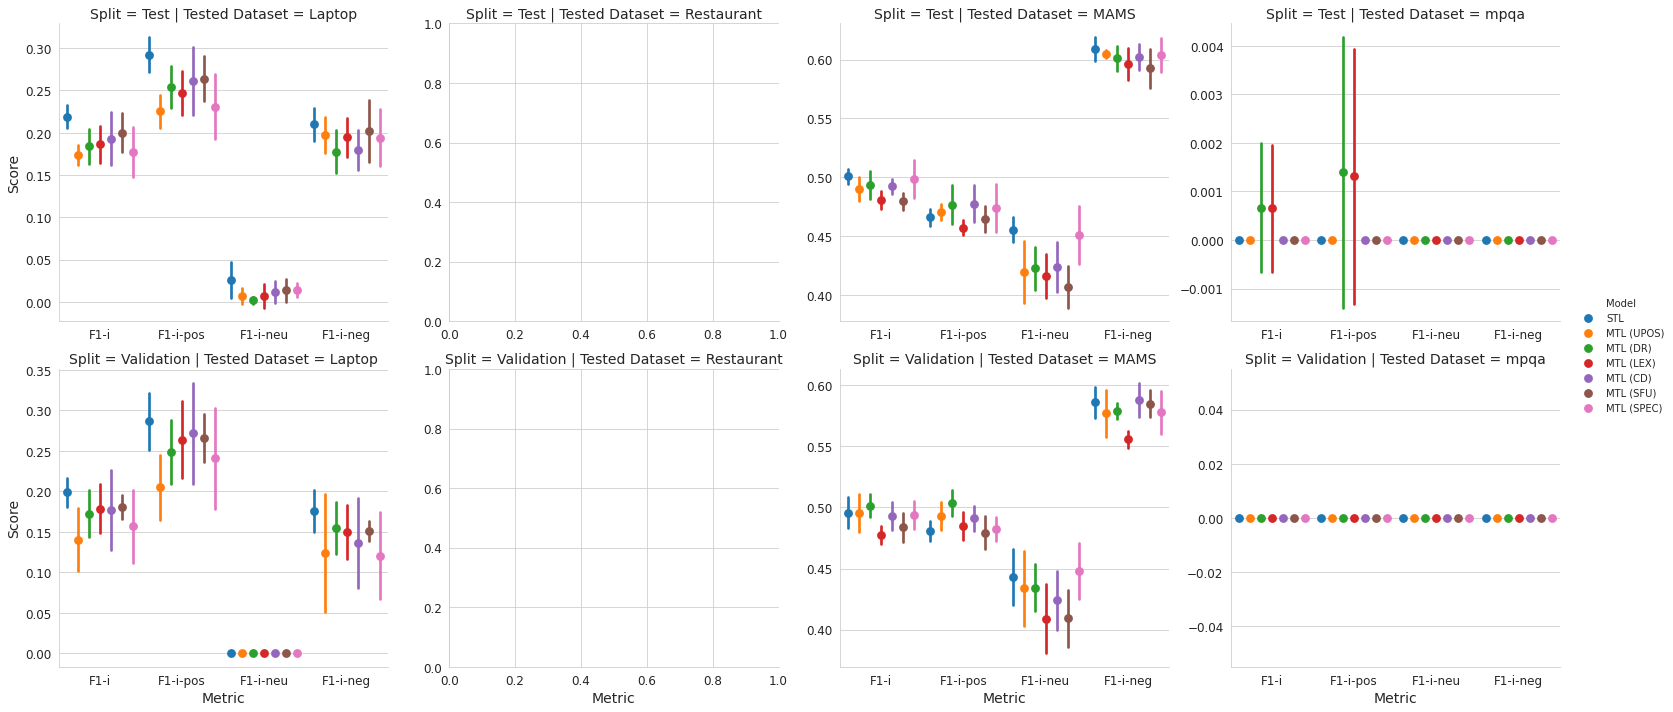

In [3]:
f1_i_order = ['F1-i', 'F1-i-pos', 'F1-i-neu', 'F1-i-neg']

f1_i_results = results_df[results_df['Metric'].isin(f1_i_order)]
f1_i_results = f1_i_results[f1_i_results['Trained Dataset']=='Restaurant']
ax=sns.catplot(data=f1_i_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_i_order,
               height=5, aspect=1.1)

## Laptop as the training dataset

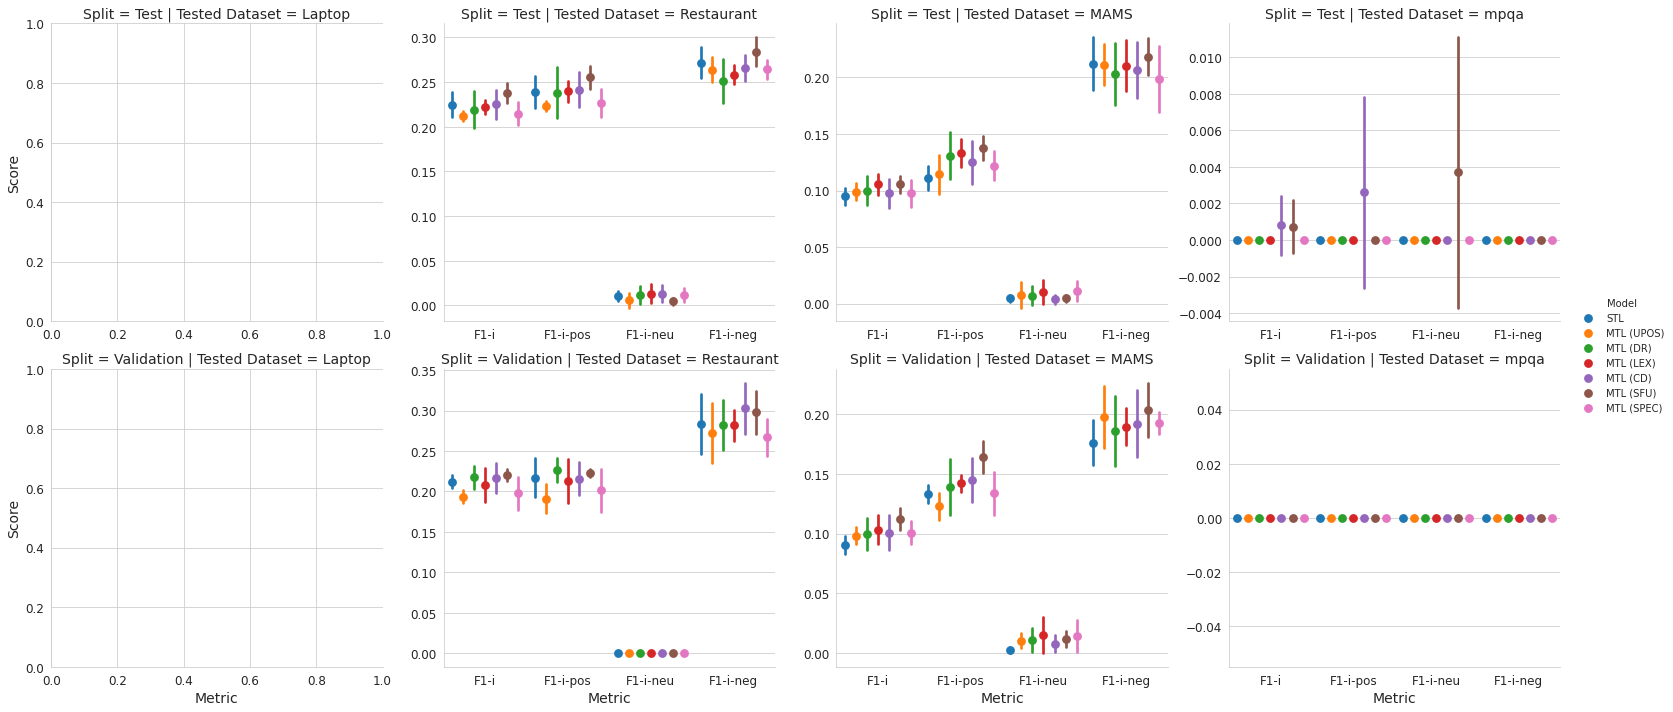

In [4]:
f1_i_order = ['F1-i', 'F1-i-pos', 'F1-i-neu', 'F1-i-neg']

f1_i_results = results_df[results_df['Metric'].isin(f1_i_order)]
f1_i_results = f1_i_results[f1_i_results['Trained Dataset']=='Laptop']
ax=sns.catplot(data=f1_i_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_i_order,
               height=5, aspect=1.1)

## MAMS as the training dataset

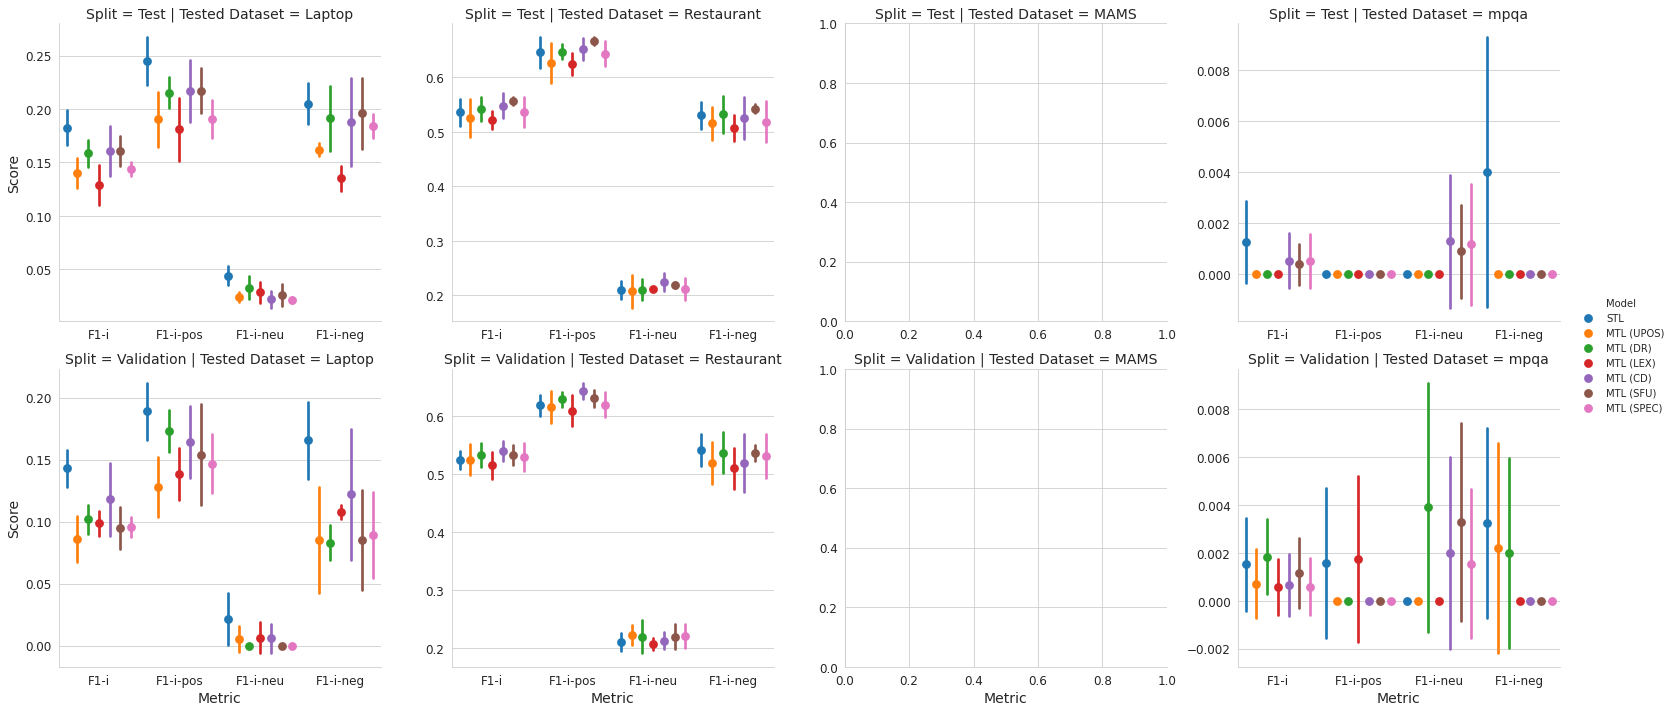

In [5]:
f1_i_order = ['F1-i', 'F1-i-pos', 'F1-i-neu', 'F1-i-neg']

f1_i_results = results_df[results_df['Metric'].isin(f1_i_order)]
f1_i_results = f1_i_results[f1_i_results['Trained Dataset']=='MAMS']
ax=sns.catplot(data=f1_i_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_i_order,
               height=5, aspect=1.1)

## Results for the F1-i metric in table format

Validation

In [6]:
f1_i_results = results_df[results_df['Metric']=='F1-i']
validation_f1_i_results = f1_i_results[f1_i_results['Split']=='Validation']
test_f1_i_results = f1_i_results[f1_i_results['Split']=='Test']
pd.pivot_table(validation_f1_i_results, index=['Tested Dataset', 'Model'], values='Score', 
               columns='Trained Dataset', aggfunc=mean_std)

Trained Dataset                  Laptop  ...         mpqa
Tested Dataset Model                     ...             
Laptop         MTL (CD)             NaN  ...  0.00 (0.00)
               MTL (DR)             NaN  ...  0.00 (0.00)
               MTL (LEX)            NaN  ...  0.00 (0.00)
               MTL (SFU)            NaN  ...  0.00 (0.00)
               MTL (SPEC)           NaN  ...  0.00 (0.00)
               MTL (UPOS)           NaN  ...  0.00 (0.00)
               STL                  NaN  ...  0.00 (0.00)
MAMS           MTL (CD)    10.06 (1.45)  ...  0.00 (0.00)
               MTL (DR)     9.92 (1.34)  ...  0.00 (0.00)
               MTL (LEX)   10.30 (1.21)  ...  0.00 (0.00)
               MTL (SFU)   11.23 (0.91)  ...  0.00 (0.00)
               MTL (SPEC)  10.07 (0.94)  ...  0.00 (0.00)
               MTL (UPOS)   9.81 (0.70)  ...  0.00 (0.00)
               STL          9.01 (0.74)  ...  0.00 (0.00)
Restaurant     MTL (CD)    21.65 (1.86)  ...  0.09 (0.17)
               MTL (DR)    21.77 (1.44)  ...  0.09 (0.17)
               MTL (LEX)   20.84 (2.07)  ...  0.09 (0.18)
               MTL (SFU)   22.06 (0.77)  ...  0.35 (0.32)
               MTL (SPEC)  19.77 (2.00)  ...  0.27 (0.36)
               MTL (UPOS)  19.35 (0.80)  ...  0.00 (0.00)
               STL         21.23 (0.85)  ...  0.26 (0.21)
mpqa           MTL (CD)     0.00 (0.00)  ...          NaN
               MTL (DR)     0.00 (0.00)  ...          NaN
               MTL (LEX)    0.00 (0.00)  ...          NaN
               MTL (SFU)    0.00 (0.00)  ...          NaN
               MTL (SPEC)   0.00 (0.00)  ...          NaN
               MTL (UPOS)   0.00 (0.00)  ...          NaN
               STL          0.00 (0.00)  ...          NaN

[28 rows x 4 columns]

Test:

In [7]:
pd.pivot_table(test_f1_i_results, index=['Tested Dataset', 'Model'], values='Score', 
               columns='Trained Dataset', aggfunc=mean_std)

Trained Dataset                  Laptop  ...         mpqa
Tested Dataset Model                     ...             
Laptop         MTL (CD)             NaN  ...  0.06 (0.11)
               MTL (DR)             NaN  ...  0.05 (0.11)
               MTL (LEX)            NaN  ...  0.22 (0.32)
               MTL (SFU)            NaN  ...  0.05 (0.11)
               MTL (SPEC)           NaN  ...  0.00 (0.00)
               MTL (UPOS)           NaN  ...  0.00 (0.00)
               STL                  NaN  ...  0.11 (0.14)
MAMS           MTL (CD)     9.75 (1.26)  ...  0.20 (0.07)
               MTL (DR)     9.98 (1.30)  ...  0.17 (0.06)
               MTL (LEX)   10.54 (0.93)  ...  0.17 (0.06)
               MTL (SFU)   10.56 (0.76)  ...  0.14 (0.00)
               MTL (SPEC)   9.76 (1.20)  ...  0.06 (0.07)
               MTL (UPOS)   9.90 (0.73)  ...  0.15 (0.00)
               STL          9.49 (0.75)  ...  0.15 (0.00)
Restaurant     MTL (CD)    22.51 (1.65)  ...  0.18 (0.17)
               MTL (DR)    21.91 (2.09)  ...  0.14 (0.12)
               MTL (LEX)   22.17 (0.77)  ...  0.17 (0.31)
               MTL (SFU)   23.82 (1.13)  ...  0.34 (0.24)
               MTL (SPEC)  21.46 (1.27)  ...  0.11 (0.11)
               MTL (UPOS)  21.19 (0.52)  ...  0.02 (0.03)
               STL         22.46 (1.37)  ...  0.39 (0.06)
mpqa           MTL (CD)     0.08 (0.16)  ...          NaN
               MTL (DR)     0.00 (0.00)  ...          NaN
               MTL (LEX)    0.00 (0.00)  ...          NaN
               MTL (SFU)    0.07 (0.15)  ...          NaN
               MTL (SPEC)   0.00 (0.00)  ...          NaN
               MTL (UPOS)   0.00 (0.00)  ...          NaN
               STL          0.00 (0.00)  ...          NaN

[28 rows x 4 columns]

## MPQA as the training dataset

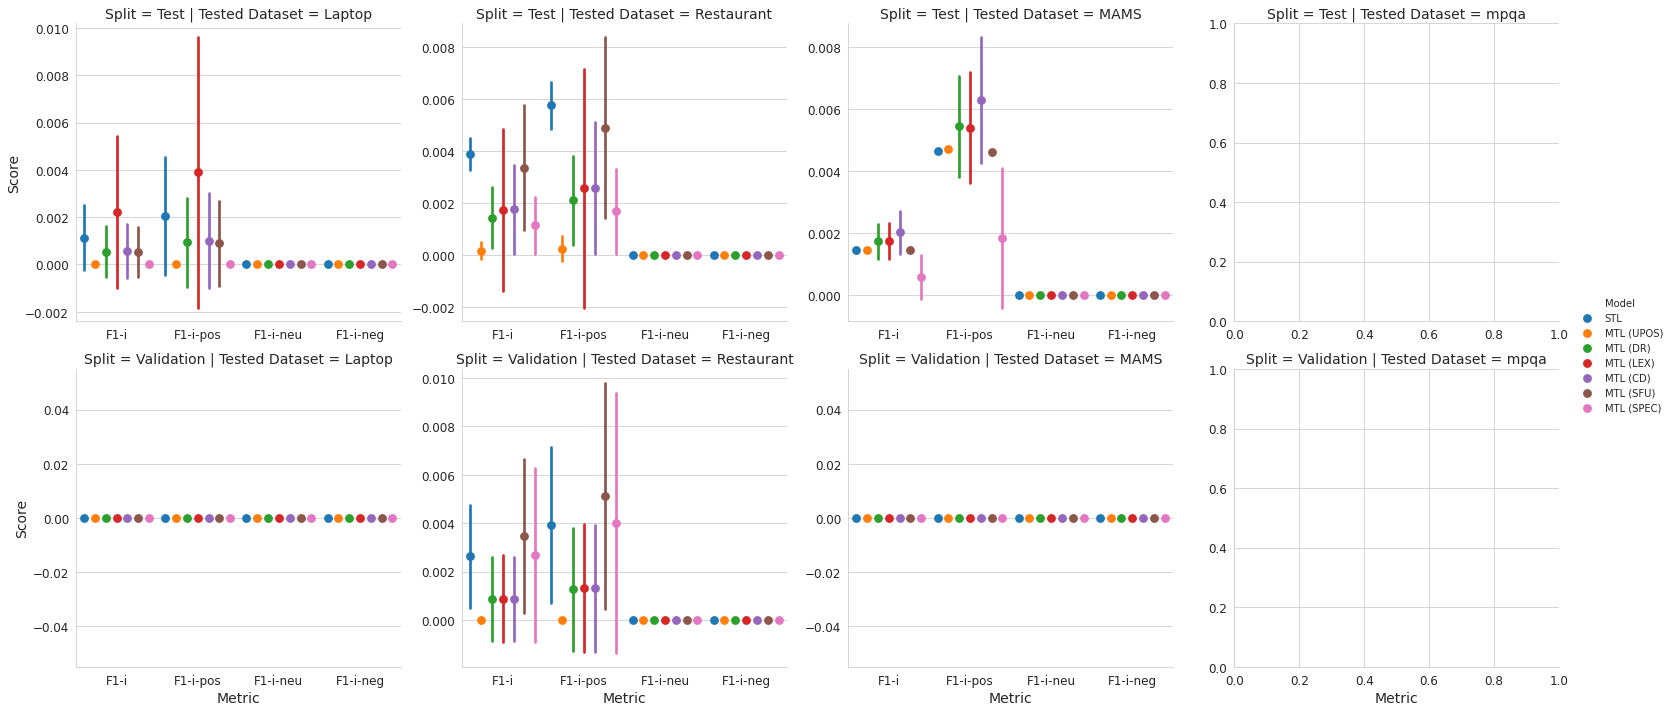

In [8]:
f1_i_order = ['F1-i', 'F1-i-pos', 'F1-i-neu', 'F1-i-neg']

f1_i_results = results_df[results_df['Metric'].isin(f1_i_order)]
f1_i_results = f1_i_results[f1_i_results['Trained Dataset']=='mpqa']
ax=sns.catplot(data=f1_i_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_i_order,
               height=5, aspect=1.1)

# F1-a

## Restaurant as the training dataset

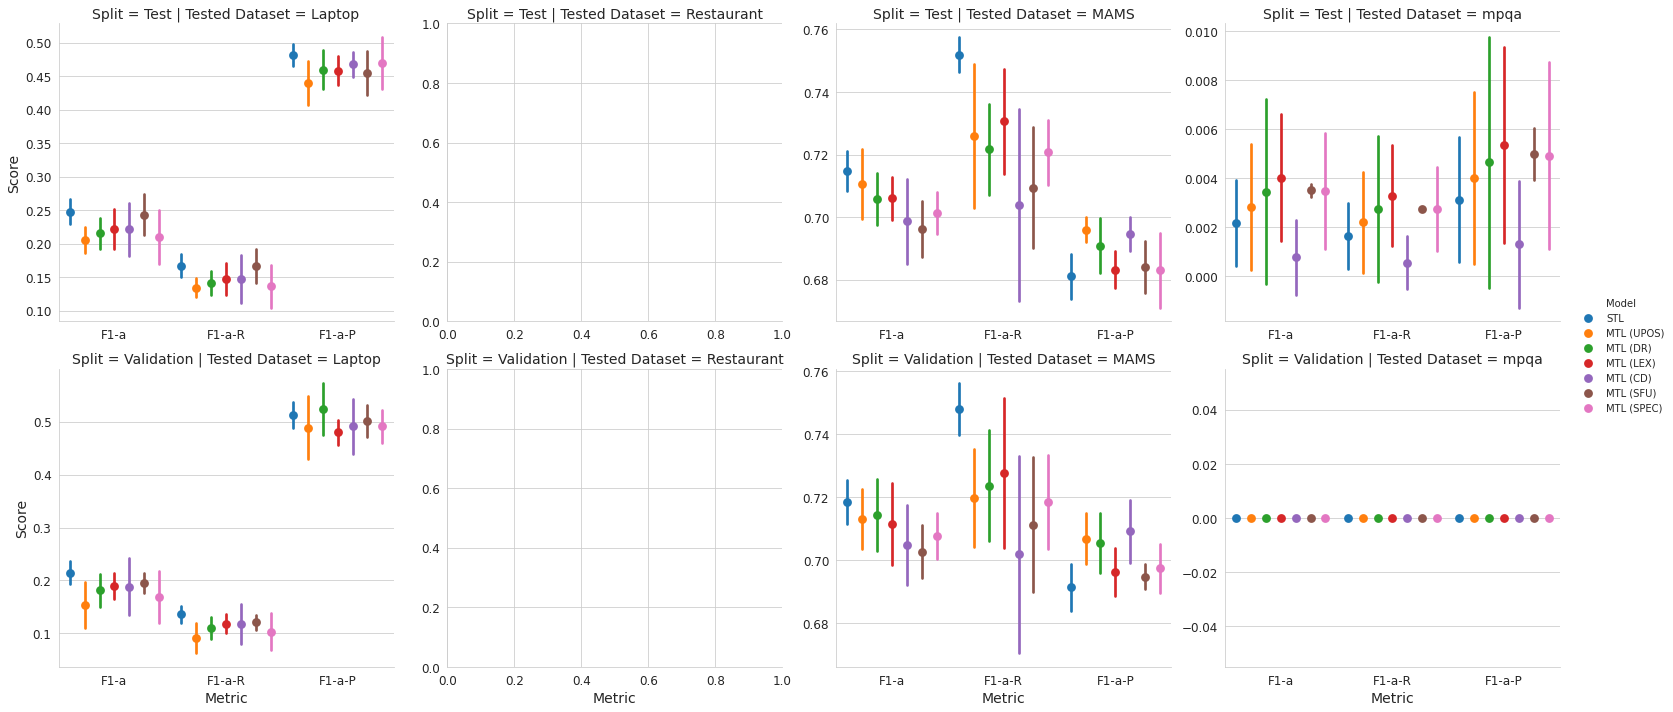

In [9]:
f1_a_order = ['F1-a', 'F1-a-R', 'F1-a-P']

f1_a_results = results_df[results_df['Metric'].isin(f1_a_order)]
f1_a_results = f1_a_results[f1_a_results['Trained Dataset']=='Restaurant']
ax=sns.catplot(data=f1_a_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_a_order,
               height=5, aspect=1.1)

## Laptop as the training dataset

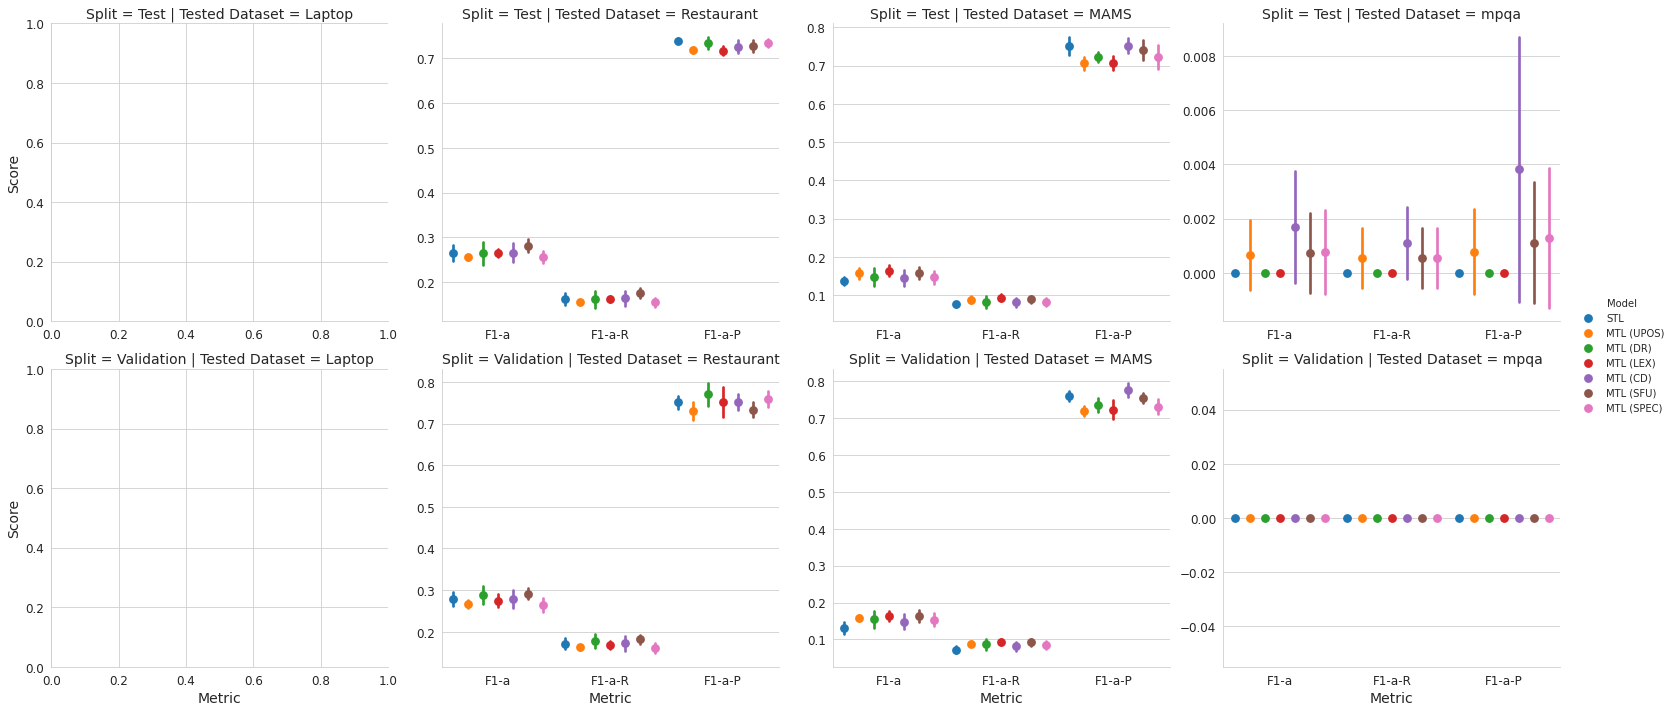

In [10]:
f1_a_order = ['F1-a', 'F1-a-R', 'F1-a-P']

f1_a_results = results_df[results_df['Metric'].isin(f1_a_order)]
f1_a_results = f1_a_results[f1_a_results['Trained Dataset']=='Laptop']
ax=sns.catplot(data=f1_a_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_a_order,
               height=5, aspect=1.1)

## MAMS as the training dataset

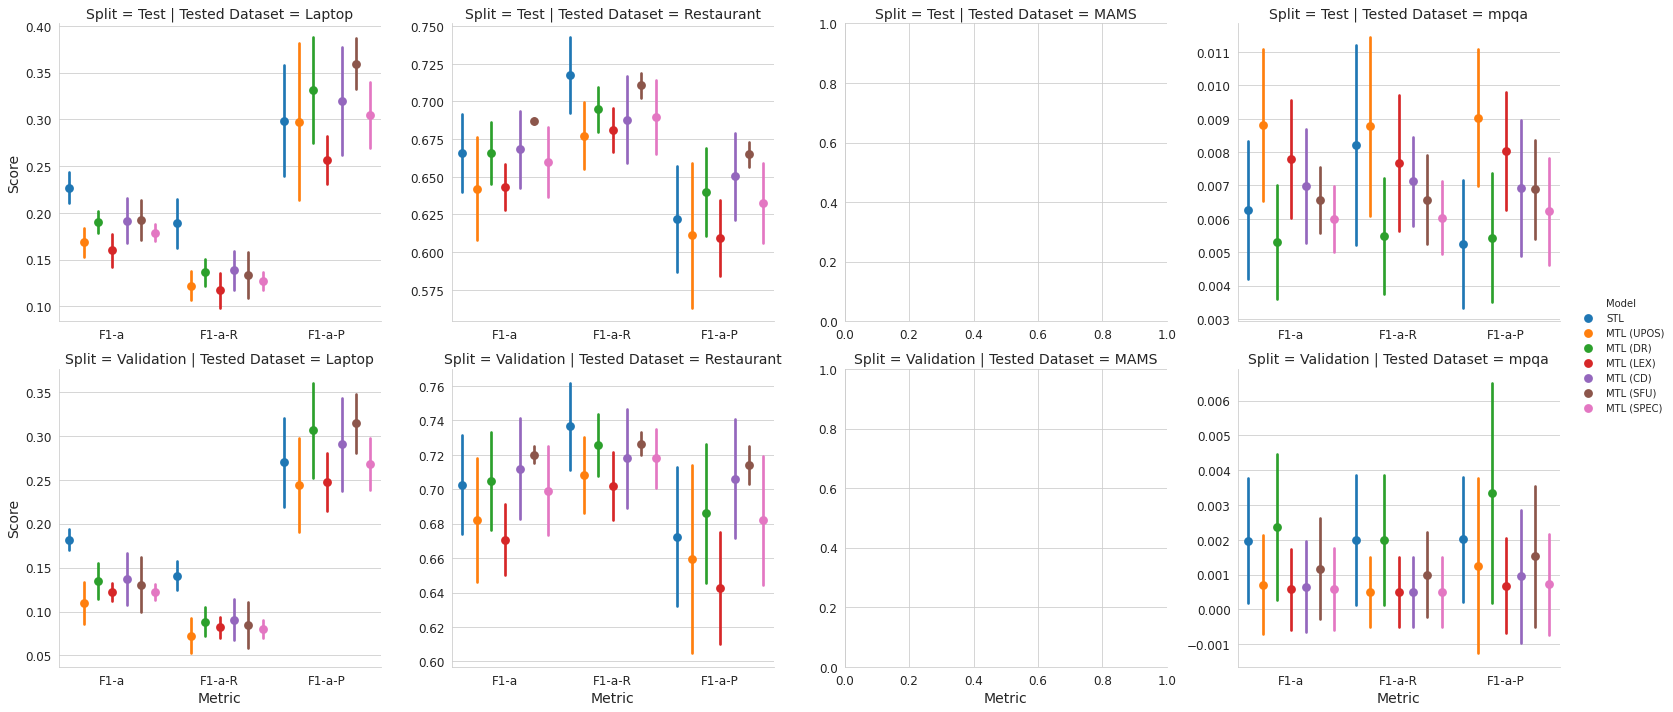

In [11]:
f1_a_order = ['F1-a', 'F1-a-R', 'F1-a-P']

f1_a_results = results_df[results_df['Metric'].isin(f1_a_order)]
f1_a_results = f1_a_results[f1_a_results['Trained Dataset']=='MAMS']
ax=sns.catplot(data=f1_a_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_a_order,
               height=5, aspect=1.1)

## MPQA as the training dataset

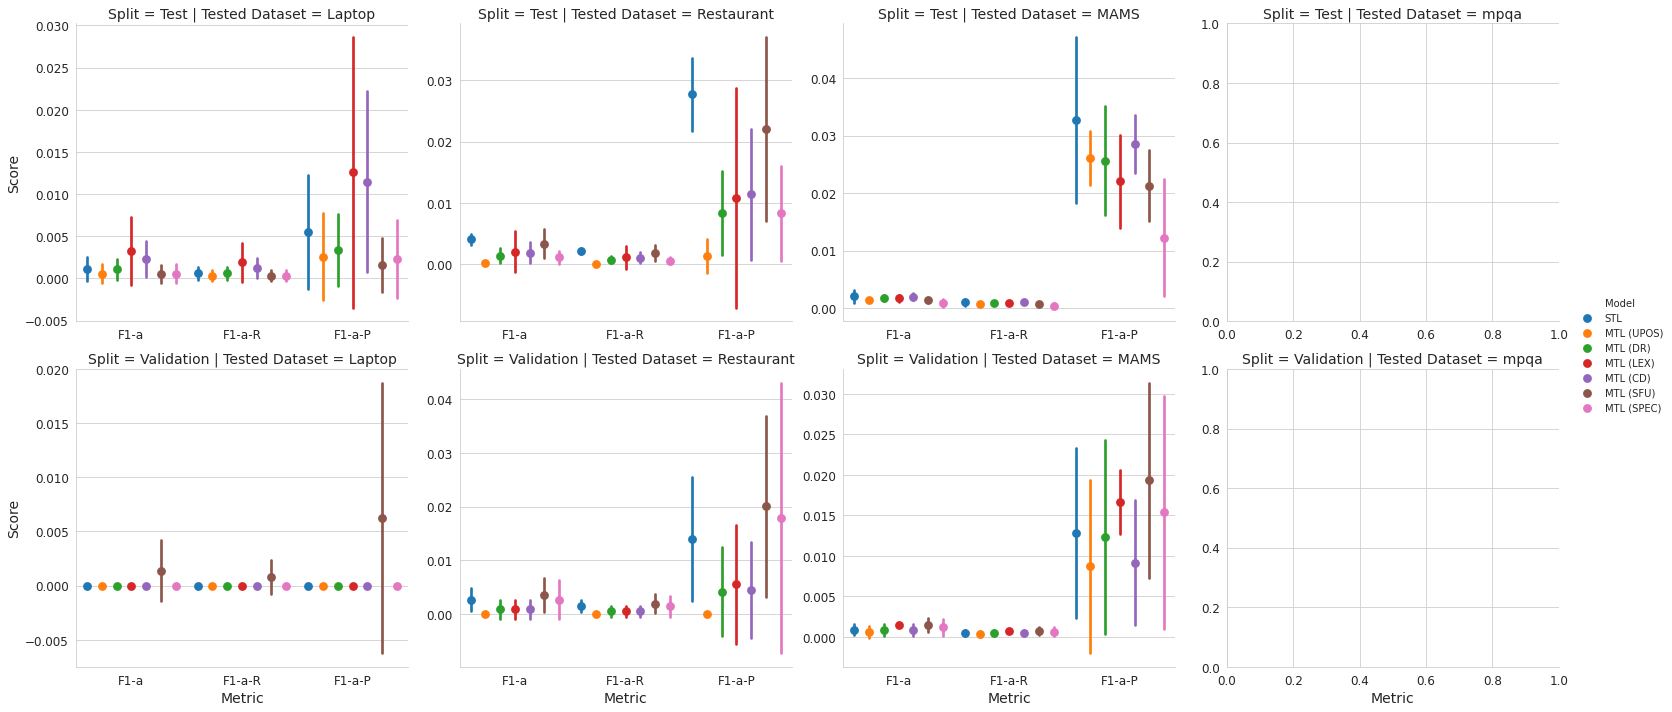

In [12]:
f1_a_order = ['F1-a', 'F1-a-R', 'F1-a-P']

f1_a_results = results_df[results_df['Metric'].isin(f1_a_order)]
f1_a_results = f1_a_results[f1_a_results['Trained Dataset']=='mpqa']
ax=sns.catplot(data=f1_a_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_a_order,
               height=5, aspect=1.1)

# F1-s and Acc-s

## Restaurant as the training dataset

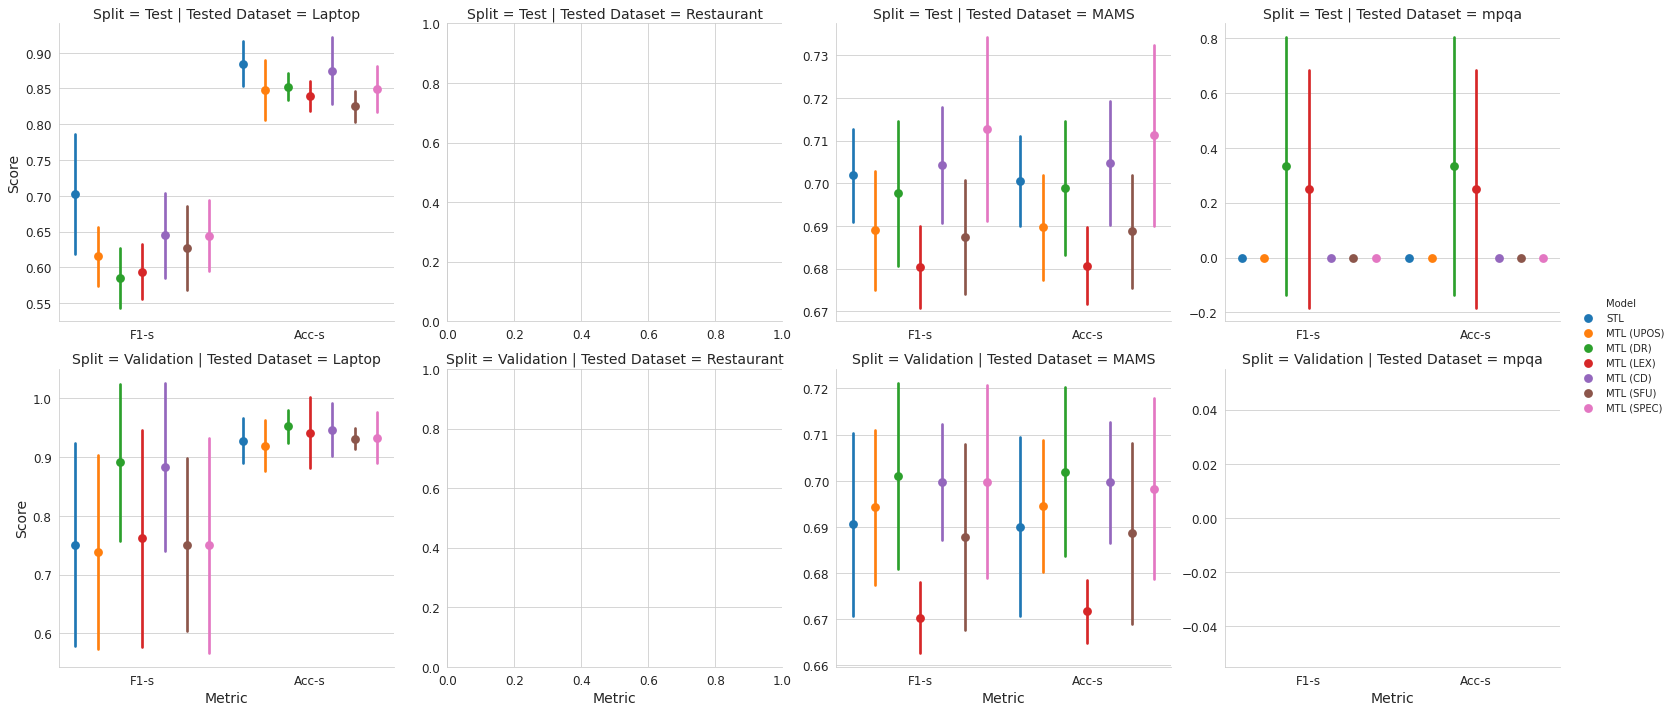

In [13]:
f1_s_order = ['F1-s', 'Acc-s']

f1_s_results = results_df[results_df['Metric'].isin(f1_s_order)]
f1_s_results = f1_s_results[f1_s_results['Trained Dataset']=='Restaurant']
ax=sns.catplot(data=f1_s_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_s_order,
               height=5, aspect=1.1)

## Laptop as the training dataset

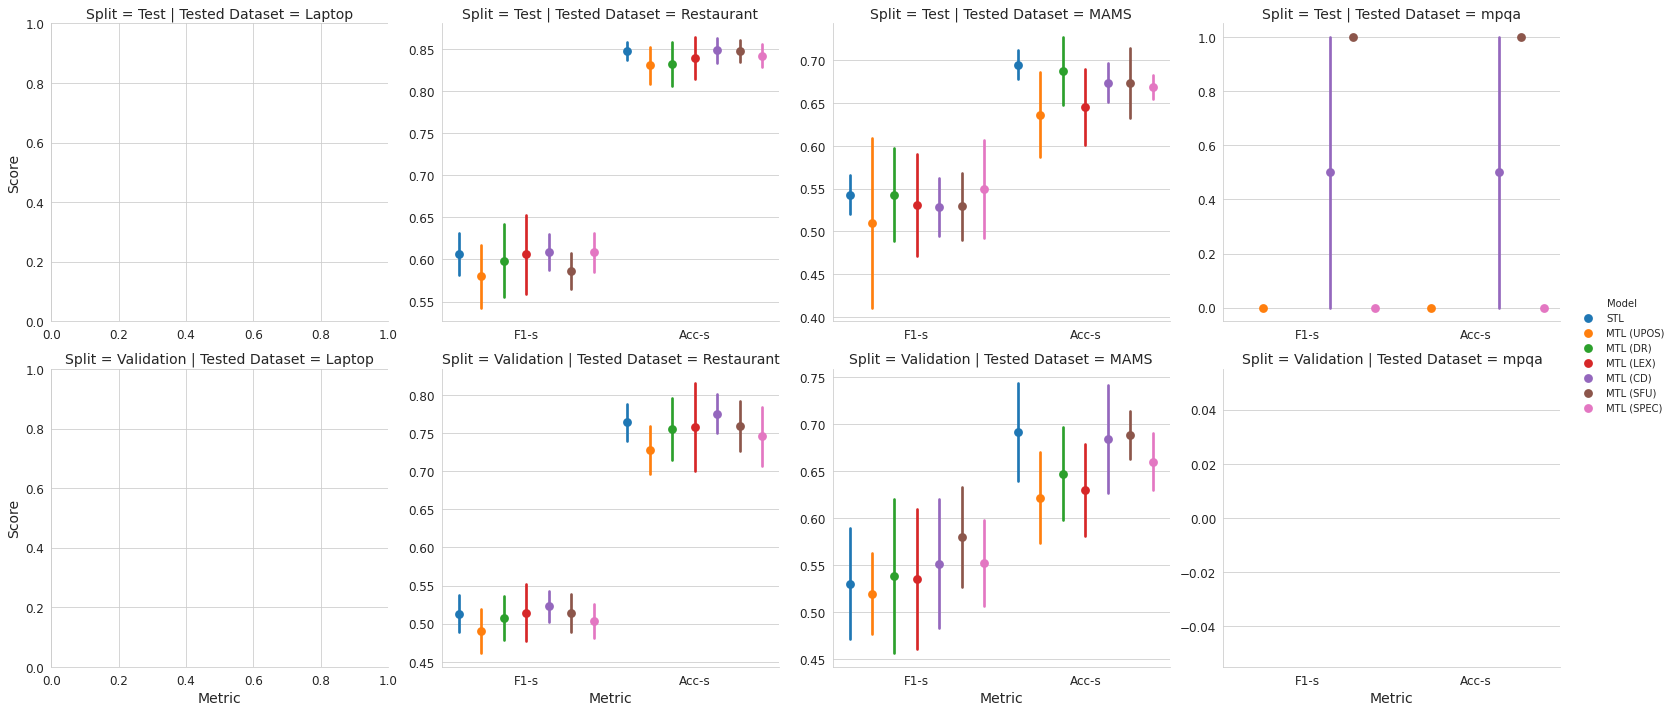

In [14]:
f1_s_order = ['F1-s', 'Acc-s']

f1_s_results = results_df[results_df['Metric'].isin(f1_s_order)]
f1_s_results = f1_s_results[f1_s_results['Trained Dataset']=='Laptop']
ax=sns.catplot(data=f1_s_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_s_order,
               height=5, aspect=1.1)

## MAMS as the training dataset

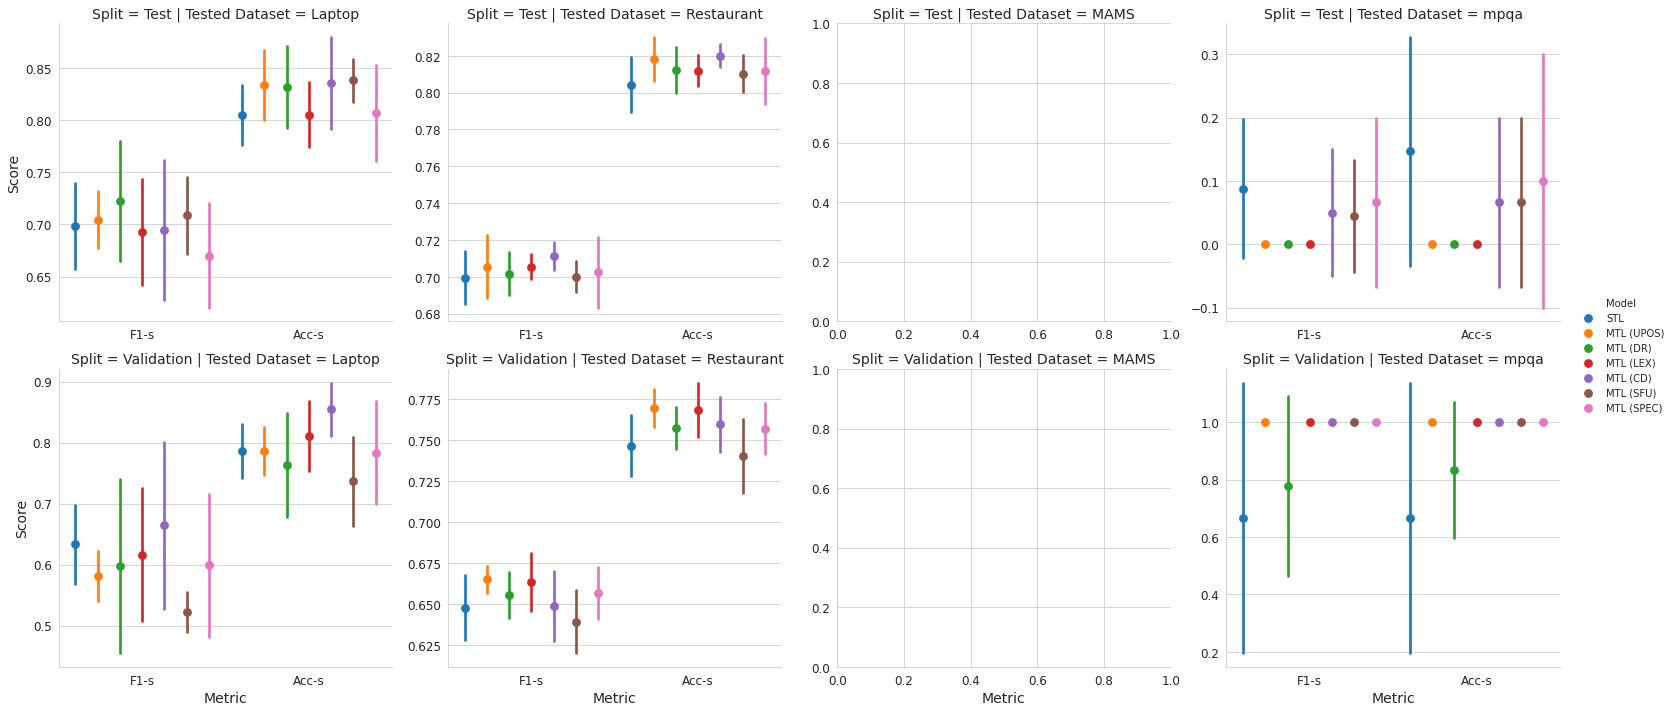

In [15]:
f1_s_order = ['F1-s', 'Acc-s']

f1_s_results = results_df[results_df['Metric'].isin(f1_s_order)]
f1_s_results = f1_s_results[f1_s_results['Trained Dataset']=='MAMS']
ax=sns.catplot(data=f1_s_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_s_order,
               height=5, aspect=1.1)

## MPQA as the training dataset

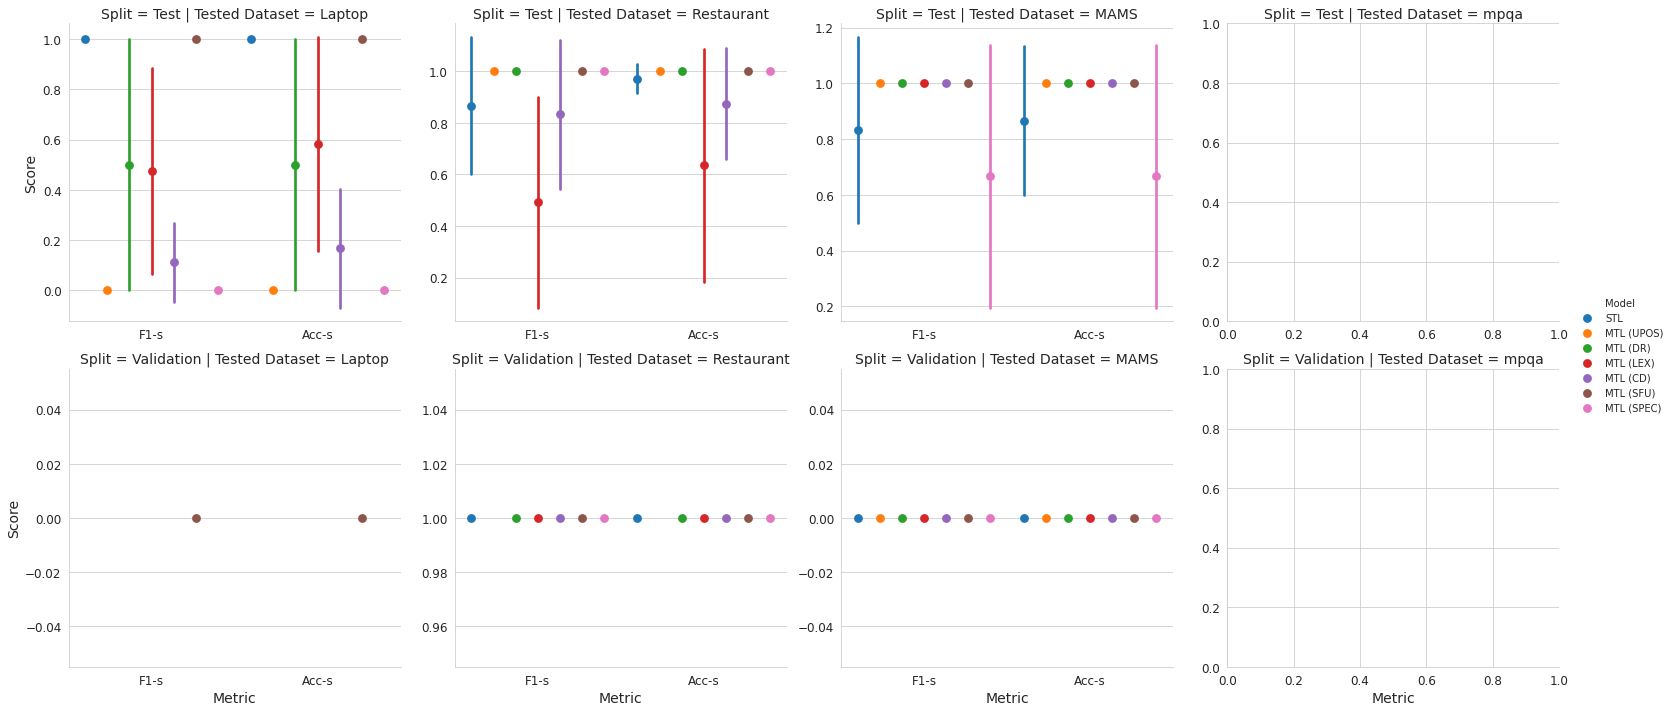

In [16]:
f1_s_order = ['F1-s', 'Acc-s']

f1_s_results = results_df[results_df['Metric'].isin(f1_s_order)]
f1_s_results = f1_s_results[f1_s_results['Trained Dataset']=='mpqa']
ax=sns.catplot(data=f1_s_results, hue='Model', row='Split', 
               col='Tested Dataset', x='Metric', 
               y='Score', sharex=False, sharey=False, kind='point', ci='sd', 
               join=False, dodge=0.8, row_order=ROW_ORDER, 
               col_order=DATASET_ORDER, 
               order=f1_s_order,
               height=5, aspect=1.1)